In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [2]:
sentence = 'Deep Learning is a subset of AI. ML is a subseet of Data Science'.lower()
sentence

'deep learning is a subset of ai. ml is a subseet of data science'

In [3]:
sentence_tokenized = sent_tokenize(sentence)
print(sentence_tokenized)

['deep learning is a subset of ai.', 'ml is a subseet of data science']


In [4]:
word_tokenized = word_tokenize(sentence)
print(word_tokenized)

['deep', 'learning', 'is', 'a', 'subset', 'of', 'ai', '.', 'ml', 'is', 'a', 'subseet', 'of', 'data', 'science']


In [5]:
import itertools
print(list(itertools.combinations(word_tokenized,2)))

[('deep', 'learning'), ('deep', 'is'), ('deep', 'a'), ('deep', 'subset'), ('deep', 'of'), ('deep', 'ai'), ('deep', '.'), ('deep', 'ml'), ('deep', 'is'), ('deep', 'a'), ('deep', 'subseet'), ('deep', 'of'), ('deep', 'data'), ('deep', 'science'), ('learning', 'is'), ('learning', 'a'), ('learning', 'subset'), ('learning', 'of'), ('learning', 'ai'), ('learning', '.'), ('learning', 'ml'), ('learning', 'is'), ('learning', 'a'), ('learning', 'subseet'), ('learning', 'of'), ('learning', 'data'), ('learning', 'science'), ('is', 'a'), ('is', 'subset'), ('is', 'of'), ('is', 'ai'), ('is', '.'), ('is', 'ml'), ('is', 'is'), ('is', 'a'), ('is', 'subseet'), ('is', 'of'), ('is', 'data'), ('is', 'science'), ('a', 'subset'), ('a', 'of'), ('a', 'ai'), ('a', '.'), ('a', 'ml'), ('a', 'is'), ('a', 'a'), ('a', 'subseet'), ('a', 'of'), ('a', 'data'), ('a', 'science'), ('subset', 'of'), ('subset', 'ai'), ('subset', '.'), ('subset', 'ml'), ('subset', 'is'), ('subset', 'a'), ('subset', 'subseet'), ('subset', 'of')

In [6]:
list(set(stopwords.words('english')))[:10]

['they', 'before', 'he', 'a', 'most', 'was', 's', 'did', "she's", 'shouldn']

In [7]:
stopwords_list = list(set(stopwords.words('english')))
word_tok_no_stopw = []
for i in word_tokenized:
    if i not in stopwords_list:
        word_tok_no_stopw.append(i)
word_tok_no_stopw
        

['deep', 'learning', 'subset', 'ai', '.', 'ml', 'subseet', 'data', 'science']

In [10]:
from nltk.probability import FreqDist
fdist = FreqDist(word_tokenized)
print(fdist)

<FreqDist with 12 samples and 15 outcomes>


In [12]:
fdist.most_common(2)

[('is', 2), ('a', 2)]

In [13]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

## POS Part Of Speech Tagging

In [18]:
nltk.pos_tag(word_tokenized)

[('deep', 'JJ'),
 ('learning', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('subset', 'NN'),
 ('of', 'IN'),
 ('ai', 'NN'),
 ('.', '.'),
 ('ml', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('subseet', 'NN'),
 ('of', 'IN'),
 ('data', 'NNS'),
 ('science', 'NN')]

## Frequency Distributions

In [2]:
Text = 'Io sono Giorgio. Giorgio è un cittadino italiano che vive a Dublino, IRL'
Text = Text.replace('IRL','Irlanda')
# freq_distribution = [i in FreqDist(Text).items()]
freq_distribution = FreqDist(i for i in word_tokenize(Text) if ((i != '.') & (i != ',')) )
dict(freq_distribution)

{'Io': 1,
 'sono': 1,
 'Giorgio': 2,
 'è': 1,
 'un': 1,
 'cittadino': 1,
 'italiano': 1,
 'che': 1,
 'vive': 1,
 'a': 1,
 'Dublino': 1,
 'Irlanda': 1}

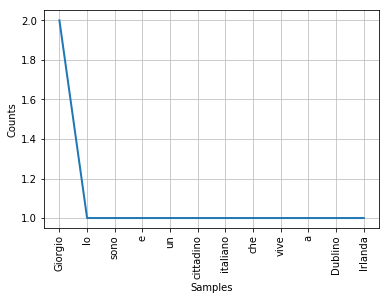

In [35]:
freq_distribution.plot()

In [36]:
# hapaxes
freq_distribution.hapaxes() # words that appear only once

['Io',
 'sono',
 'è',
 'un',
 'cittadino',
 'italiano',
 'che',
 'vive',
 'a',
 'Dublino',
 'Irlanda']

sometimes the words occuring once are more significant/relevant to a specific text/document. It could represent a keyword. In other cases it could only be a non-meaningful word.

In [41]:
# we could look at the long words of a text. Those words could be more characteristic and informative. 
unique_words = set(freq_distribution)
long_words = [i.lower() for i in unique_words if len(i) > 6]
sorted(long_words)

['cittadino', 'dublino', 'giorgio', 'irlanda', 'italiano']

Long words are usually hapaxes (~ unique)

It is good to find long words that are not hapaxes (occuring more than once)

In [12]:
Text1 = Text + '. ' + 'Molte persone sono diligenti e determinate. Questo spiega la loro voglia di intraprendenza. Questa intraprendenza è un vantaggio nel mondo di oggi'
Text1

'Io sono Giorgio. Giorgio è un cittadino italiano che vive a Dublino, Irlanda. Molte persone sono diligenti e determinate. Questo spiega la loro voglia di intraprendenza. Questa intraprendenza è un vantaggio nel mondo di oggi'

In [13]:
freq_distribution_text1 = FreqDist(i for i in word_tokenize(Text1.lower()) if (i !=',') & (i != '.'))
dict(freq_distribution_text1)

{'io': 1,
 'sono': 2,
 'giorgio': 2,
 'è': 2,
 'un': 2,
 'cittadino': 1,
 'italiano': 1,
 'che': 1,
 'vive': 1,
 'a': 1,
 'dublino': 1,
 'irlanda': 1,
 'molte': 1,
 'persone': 1,
 'diligenti': 1,
 'e': 1,
 'determinate': 1,
 'questo': 1,
 'spiega': 1,
 'la': 1,
 'loro': 1,
 'voglia': 1,
 'di': 2,
 'intraprendenza': 2,
 'questa': 1,
 'vantaggio': 1,
 'nel': 1,
 'mondo': 1,
 'oggi': 1}

In [18]:
long_meaningfull_word = [(i,j) for i,j in dict(freq_distribution_text1).items() if (len(i) > 7) & (j>1)]
long_meaningfull_word

[('intraprendenza', 2)]

### Collocations & Bigrams
A collocation is a sequence of words that occur together unusually often. 
For example:
    - Red wine is a collocation
    - The wine is not

#### Bigrams

In [75]:
from nltk import bigrams, collocations
bigrams_from_text = bigrams(word_tokenize(Text1))
list(bigrams_from_text)[:6]

[('Io', 'sono'),
 ('sono', 'Giorgio'),
 ('Giorgio', '.'),
 ('.', 'Giorgio'),
 ('Giorgio', 'è'),
 ('è', 'un')]

In [72]:
bigrams_from_text = bigrams(word_tokenize(Text1))
list(iter(dict(FreqDist(i for i in list(bigrams_from_text))).items()))[:6]

[(('Io', 'sono'), 1),
 (('sono', 'Giorgio'), 1),
 (('Giorgio', '.'), 1),
 (('.', 'Giorgio'), 1),
 (('Giorgio', 'è'), 1),
 (('è', 'un'), 2)]

we want to pay more attention to the cases that involve rare words

In [141]:
# nltk.Text(tkn for tkn in word_tokenize('mary had a little lamb.'))
text = nltk.Text(tkn for tkn in word_tokenize(Text1))
text.collocations()

#### to compare pairs of words to see which pair is "more likely to occur

In [151]:
import nltk.collocations
import nltk.corpus
import collections

bgm    = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(
    nltk.corpus.brown.words())
scored = finder.score_ngrams( bgm.likelihood_ratio  )

# Group bigrams by first word in bigram.                                        
prefix_keys = collections.defaultdict(list)
for key, scores in scored:
   prefix_keys[key[0]].append((key[1], scores))

# Sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
   prefix_keys[key].sort(key = lambda x: -x[1])

print ('car', prefix_keys['car'][:20])

car [('.', 40.793367085924), ('driven', 40.39464919971393), ('parked', 30.140479249336586), ('loadings', 26.75225901479738), ('was', 24.33031729391221), ('with', 23.603613758294117), ('coming', 20.139615410702373), (',', 19.425346200134072), ('speed', 14.81190468338248), ('resolutely', 13.964653398082529), ('skidded', 13.964653398082529), ('sales', 13.029282353863426), ('gulped', 12.918620482057962), ('streaked', 12.239487707062585), ('and', 12.146645735873587), ('industry', 12.026317411110071), ('lurched', 11.73460800098334), ('tracks', 10.03941833795229), ('swallowed', 9.857812261864147), ('rental', 9.691415531351007)]


In [162]:
fdist = FreqDist(i.lower() for i in word_tokenize(Text1) if (i != '.'))
fdist

FreqDist({'sono': 2, 'giorgio': 2, 'è': 2, 'un': 2, 'di': 2, 'intraprendenza': 2, 'io': 1, 'cittadino': 1, 'italiano': 1, 'che': 1, ...})

In [211]:
fdist1 = FreqDist(i for i in word_tokenize('ciao io sono sono sono giorgio giorgio giorgio'))
fdist1

FreqDist({'sono': 3, 'giorgio': 3, 'ciao': 1, 'io': 1})

In [213]:
fdist > fdist1 # test if samples in fdist occur less frequently than in fdist1

True

Frequence of word giorgio
%%%%%%%%%%
Percentage of the frequence of the word giorgio is 0.056
%%%%%%%%%%
Total number of samples/words: 36
%%%%%%%%%%
Word with highest frequence: sono
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
          sono        giorgio              è             un             di intraprendenza             io      cittadino       italiano            che           vive              a        dublino              ,        irlanda          molte        persone      diligenti              e    determinate         questo         spiega             la           loro         voglia         questa      vantaggio            nel          mondo           oggi 
             2              2              2              2              2              2              1              1              1              1              1              1              1              1              1              1              1          

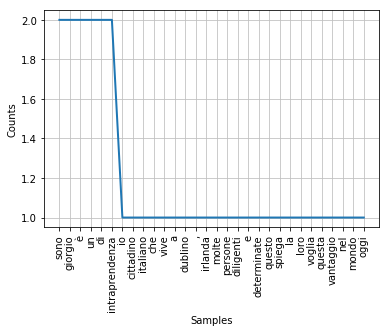

Plot AxesSubplot(0.125,0.125;0.775x0.755)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


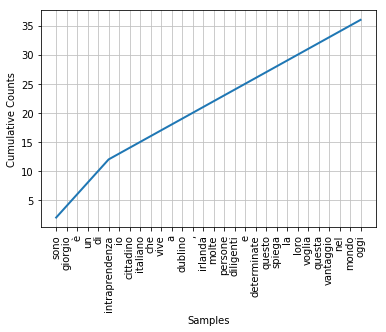

Plot cumulative True AxesSubplot(0.125,0.125;0.775x0.755)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [208]:
print('Frequence of word giorgio'.format(fdist['giorgio']))
print(10*'%')
print('Percentage of the frequence of the word giorgio is {}'.format(round(fdist.freq('giorgio'),3)))
print(10*'%')
print('Total number of samples/words: {}'.format(fdist.N()))
print(10*'%')
print('Word with highest frequence: {}'.format(fdist.max()))
print(100*'%')
print('Tabulate the frequency distribution: {}'.format(fdist.tabulate()))
print(100*'%')
print('Plot',fdist.plot())
print(100*'%')
print('Plot cumulative True',fdist.plot(cumulative = True))
print(100*'%')

In [254]:
# i.startswith() - i.endswith() - i.islower() - 
# i.isupper() - i.isalpha() - i.isalnum() - i.isdigit() - i.istitle()
Text = 'Napoli è una città della Campania 10'
print('Text is: ',Text)
print(10*'-')
print('.islower() : ',[i for i in word_tokenize(Text) if i.islower()]) # if i is lowercase
print(10*'-')
print('.isupper() :', [i for i in word_tokenize(Text) if i.isupper()]) # if i is uppercase
print(10*'-')
print('.isalpha() :', [i for i in word_tokenize(Text) if i.isalpha()]) # if there i is alphabetic
print(10*'-')
print('.isalnum() :', [i for i in word_tokenize(Text) if i.isalnum()]) # if there is a digit or alphabetic
print(10*'-')
print('.isdigit() :', [i for i in word_tokenize(Text) if i.isdigit()]) # if there is a digit
print(10*'-')
print('.istitle() :', [i for i in word_tokenize(Text) if i.istitle()]) # if the first letter is upper case
print(10*'-')
print('.startwith() :', [i for i in word_tokenize(Text) if i.lower().startswith('c')]) # if i startswith()
print(10*'-')
print('.endswith() :', [i for i in word_tokenize(Text) if i.lower().endswith('i')])# if i endswith()

Text is:  Napoli è una città della Campania 10
----------
.islower() :  ['è', 'una', 'città', 'della']
----------
.isupper() : []
----------
.isalpha() : ['Napoli', 'è', 'una', 'città', 'della', 'Campania']
----------
.isalnum() : ['Napoli', 'è', 'una', 'città', 'della', 'Campania', '10']
----------
.isdigit() : ['10']
----------
.istitle() : ['Napoli', 'Campania']
----------
.startwith() : ['città', 'Campania']
----------
.endswith() : ['Napoli']


sorted([i.lower() for i in word_tokenize(Text) if len(i) > 3]) # sorted text

In [260]:
[i.upper() for i in word_tokenize(Text)]

['NAPOLI', 'È', 'UNA', 'CITTÀ', 'DELLA', 'CAMPANIA', '10']

In [263]:
# create dictionary from words in a sentence
dict((v,k) for k,v in enumerate(set((word_tokenize(Text))),1))

{'della': 1, 'Campania': 2, 'è': 3, '10': 4, 'città': 5, 'una': 6, 'Napoli': 7}

### Nested Code Blocks
#### looping and conditions
if, else, elif, for

In [268]:
# Nested Code Blocks
# elif
sent = 'I am from Italy'
for i in word_tokenize(sent):
    if i.islower():
        print(i,'-> is lower')
    elif (i.isupper() or i.istitle()):
        print(i, '-> is upper or title')
    else:
        print(i, '-> exception')

I -> is upper or title
am -> is lower
from -> is lower
Italy -> is upper or title


#### Machine Traslation

In [274]:
from nltk.book import *
# babelize_shell() # probably the library  is not working anymore
# this program submits a sentence for translation into a specified language,
# then submits the resulting sentence for translation back into English. 
# It stops after 12 iterations, or if it receives a translation that was produced already.

#### text alignment
Given a document in German and Englisn, and given a bilingual dictionary, we can automatically pair up the sentences.
this process is called text alignment. 

Once we have a million or more sentence pairs,
we can detect corresponding words and phrases, and build a model that can be used for translating new text

#### ConditionalFreqDist - Generate Text - Next most likely word
The following code obtains all bigrams from the text (e.g. text of the book of Genesis,thenconstructs a conditional frequency distribution to record which words are most likely to follow a given word. For example, after the word living, the most likely word is creature.

The generate_model() function uses this data, and a seed word, to generate random text

In [337]:
def generate_model(cfdist,word,num = 5):
    for i in range(num):
        print(word)
        word = cfdist[word].max()


In [364]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [365]:
list(text)[:10] + ['...']

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '...']

In [390]:
[(k,v) for k,v in enumerate(FreqDist(nltk.bigrams(text)).items())]

[(0, (('In', 'the'), 9)),
 (1, (('the', 'beginning'), 5)),
 (2, (('beginning', 'God'), 1)),
 (3, (('God', 'created'), 6)),
 (4, (('created', 'the'), 1)),
 (5, (('the', 'heaven'), 7)),
 (6, (('heaven', 'and'), 3)),
 (7, (('and', 'the'), 174)),
 (8, (('the', 'earth'), 105)),
 (9, (('earth', '.'), 30)),
 (10, (('.', 'And'), 1038)),
 (11, (('And', 'the'), 185)),
 (12, (('earth', 'was'), 3)),
 (13, (('was', 'without'), 2)),
 (14, (('without', 'form'), 1)),
 (15, (('form', ','), 1)),
 (16, ((',', 'and'), 1491)),
 (17, (('and', 'void'), 1)),
 (18, (('void', ';'), 1)),
 (19, ((';', 'and'), 262)),
 (20, (('and', 'darkness'), 1)),
 (21, (('darkness', 'was'), 1)),
 (22, (('was', 'upon'), 7)),
 (23, (('upon', 'the'), 70)),
 (24, (('the', 'face'), 23)),
 (25, (('face', 'of'), 24)),
 (26, (('of', 'the'), 372)),
 (27, (('the', 'deep'), 3)),
 (28, (('deep', '.'), 1)),
 (29, (('the', 'Spirit'), 2)),
 (30, (('Spirit', 'of'), 2)),
 (31, (('of', 'God'), 16)),
 (32, (('God', 'moved'), 1)),
 (33, (('moved',

In [338]:
print(list(cfd['living']))

['creature', 'thing', 'soul', '.', 'substance', ',']


In [339]:
generate_model(cfd,'living')

living
creature
that
he
said


In [436]:
text = 'Quando il sole sorge, gli uccelli iniziano a cinguettare. Quando il sole tramonta, \
gli uccelli iniziano ad addormentarsi'
text

'Quando il sole sorge, gli uccelli iniziano a cinguettare. Quando il sole tramonta, gli uccelli iniziano ad addormentarsi'

In [395]:
bigrams = nltk.bigrams(word_tokenize(text))
cfd = nltk.ConditionalFreqDist(bigrams)

In [398]:
print('quando',list(cfd['Quando']))
print('gli uccelli', list(cfd['uccelli']))

quando ['il']
gli uccelli ['iniziano']


In [400]:
print(generate_model(cfd,'Quando'))
print(10*'%')
print(generate_model(cfd,'uccelli'))

Quando
il
sole
sorge
,
None
%%%%%%%%%%
uccelli
iniziano
a
cinguettare
.
None


#### Functions
A function is a block of code that performs a well-defined task.

##### Text diversity score function

In [401]:
# function to calculate a diversity score
def lexical_diversity(text):
    word_count = len(text)
    vocab_size = len(set(text))
    diversity_score = word_count / vocab_size
    return diversity_score

In [414]:
print(text,round(lexical_diversity(text),2))
print(10 * '%')
text1 = 'ciao io sono giorgio'
print(text1,round(lexical_diversity(text1),2))

Quando il sole sorge, gli uccelli iniziano a cinguettare. Quando il sole tramonta, gli uccelli iniziano ad addormentarsi 6.32
%%%%%%%%%%
ciao io sono giorgio 2.22


##### Function for plural

In [420]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh','ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'
# notice that endswith is called 'method' because it is a function associateed to a string object

In [424]:
print('man',plural('man'))
print('fly', plural('fly'))
print('match', plural('match'))

print('fan',plural('fan'), '--> wrong. It should be: fans')

man men
fly flies
match matches
fan fen --> wrong. It should be: fans


##### module
a module is a collection of variable and function definitions in a file. A collection of related modules is called a package. A set of packages is called library (e.g. NLTK)

##### unusual_words :  misspelled words - uncommon words

In [426]:
def uncommon_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words()) # english vocabulary
    unusual = text_vocab.difference(english_vocab) # difference function
    return sorted(unusual)

In [438]:
print(uncommon_words(word_tokenize(text)))
print(20*'%')
print('adding now misspelled word')
text1 = text + ' cet' # instead of cat
print(uncommon_words(word_tokenize(text1)))

['addormentarsi', 'cinguettare', 'gli', 'il', 'iniziano', 'quando', 'sorge', 'tramonta', 'uccelli']
%%%%%%%%%%%%%%%%%%%%
adding now misspelled word
['addormentarsi', 'cet', 'cinguettare', 'gli', 'il', 'iniziano', 'quando', 'sorge', 'tramonta', 'uccelli']


In [444]:
print('example of english_vocab')
list(set(w.lower() for w in nltk.corpus.words.words()))[:10]

example of english_vocab


['handled',
 'opisthothelae',
 'tetraboric',
 'unsecreted',
 'caliver',
 'henyard',
 'sulfobenzide',
 'rowelhead',
 'medimn',
 'unmoving']

In [455]:
# difference function to find differences between dictionaries
text2 = 'cane ciao sorge' # sorge is in text1
set(word_tokenize(text2)).difference(set(word_tokenize(text1)))

{'cane', 'ciao'}

##### stopwords
very often we decide to get rid of stopwords since they have little lexical content and they represent noisy

In [459]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('english')
list_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

##### function to compute what fraction of words in a text are not in the stopwords list

In [470]:
def content_fraction(text):
    list_stopwords = stopwords.words('english')
    content = [w for w in word_tokenize(text) if w.lower() not in list_stopwords]
    return round(len(content)/len(text),3)

In [471]:
print('text is :', text)
print('the fraction of non stop words is:', content_fraction(text))
print(20*'%')
print('words in text that are stopwords:', [w for w in word_tokenize(text) if w in stopwords.words('english')])

text is : Quando il sole sorge, gli uccelli iniziano a cinguettare. Quando il sole tramonta, gli uccelli iniziano ad addormentarsi
the fraction of non stop words is: 0.167
%%%%%%%%%%%%%%%%%%%%
words in text that are stopwords: ['a']


In [475]:
puzzle_letters = nltk.FreqDist('egivrvonl')
puzzle_letters

FreqDist({'v': 2, 'e': 1, 'g': 1, 'i': 1, 'r': 1, 'o': 1, 'n': 1, 'l': 1})

##### puzzle game:
how many words of six letters or more can you make from a list of letters (e.g. egivrvonl)?
each letter may be used once per word. Each word must contain the letter 'r' and there must be at least one nine-letter word.
No plulars ending in 's'; no foreign words, no proper names.

In [476]:
obligatory = 'r' # the letter we want in each word
wordlist = nltk.corpus.words.words() # english vocabulary
[w for w in wordlist if len(w) >=6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters]
#  nltk.FreqDist(w) <= puzzle_letters this means that
# The frequency of each letter in the word w has to be lower than the letter frequency in puzzle letters

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [479]:
nltk.FreqDist('glar') <= puzzle_letters

False

In [480]:
nltk.FreqDist('glar')

FreqDist({'g': 1, 'l': 1, 'a': 1, 'r': 1})

##### wordlist corpus containing all Names --> Names Corpus

In [485]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [488]:
male_names = names.words('male.txt')
male_names[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

In [489]:
female_names = names.words('female.txt')
female_names[:10]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale']

In [491]:
# name in both files
[w for w in male_names if w in female_names][:10]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie']

##### plot last name letter against male female names

It is well known that names ending in the letter a are almost always female. We can see this and some other patterns in the below graph

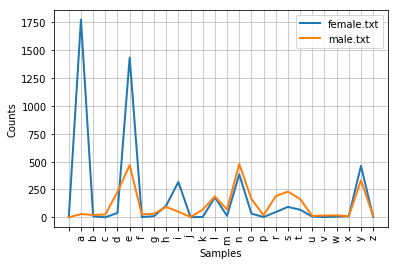

In [495]:
cfd = nltk.ConditionalFreqDist((fileid, name[-1]) for fileid in names.fileids() for name in names.words(fileid))
cfd.plot()